<a href="https://colab.research.google.com/github/arromeroj/Prueba/blob/main/Prueba_24_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desarrollo Prueba: Análisis de la satisfacción del vino blanco**

**Exploración de datos.**

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

Carga del archivo origen de datos.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Datos_vinos_blancos.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,pricing,country
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,0.088,84.0,Budget,Italy
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,0.095,12.0,Expensive,Spain
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,0.101,54.0,Medium,Italy
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,88.0,Medium,Spain
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,0.099,80.0,Expensive,Spain


Cantidad de filas y columnas del archivo, con los nombres de las columnas

In [ ]:
#Análisis exploratorio de datos
print(data.shape)
print(data.columns)

(4898, 14)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'success', 'pricing', 'country'],
      dtype='object')


Estadísticas generales de las variables numéricas.

In [ ]:
#Análisis exploratorio de datos
pd.options.display.float_format = "{:.2f}".format
data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,0.10,55.07
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,0.02,28.76
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,-0.15,10.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,0.09,19.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,0.10,60.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,0.11,83.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,0.14,99.00


In [ ]:
#Valores faltantes por columnas 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
success                 0
pricing                 0
country                 0
dtype: int64

Análisis de valores faltantes y del datatype de cada variable.

In [ ]:
#Análisis exploratorio de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  success               4898 non-null   float64
 12  pricing               4898 non-null   object 
 13  country               4898 non-null   object 
dtypes: float64(12), object(2)
memory usage: 535.8+ KB


Distribución de la variable país, por medio de un Boxplot.

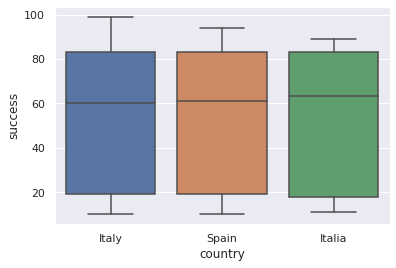

In [ ]:
sns.boxplot(data = data, x = "country", y = "success")

Recodificación de la variable de país.

In [4]:
data['country'].replace({'Italia':'Italy'},inplace=True)

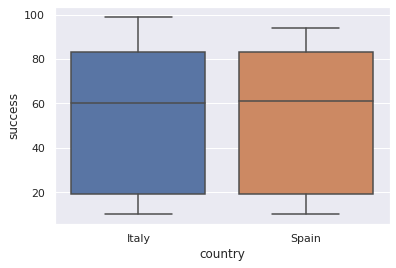

In [5]:
sns.boxplot(data = data, x = "country", y = "success")

Generación de archivo CSV, para análisis y visualizaciones por medio de Tableau.

In [ ]:
if True:
    data.to_csv('/content/drive/My Drive/recuentos_vinos.csv', index= False)

**Modelo predictivo**

Mapa de correlación de variables

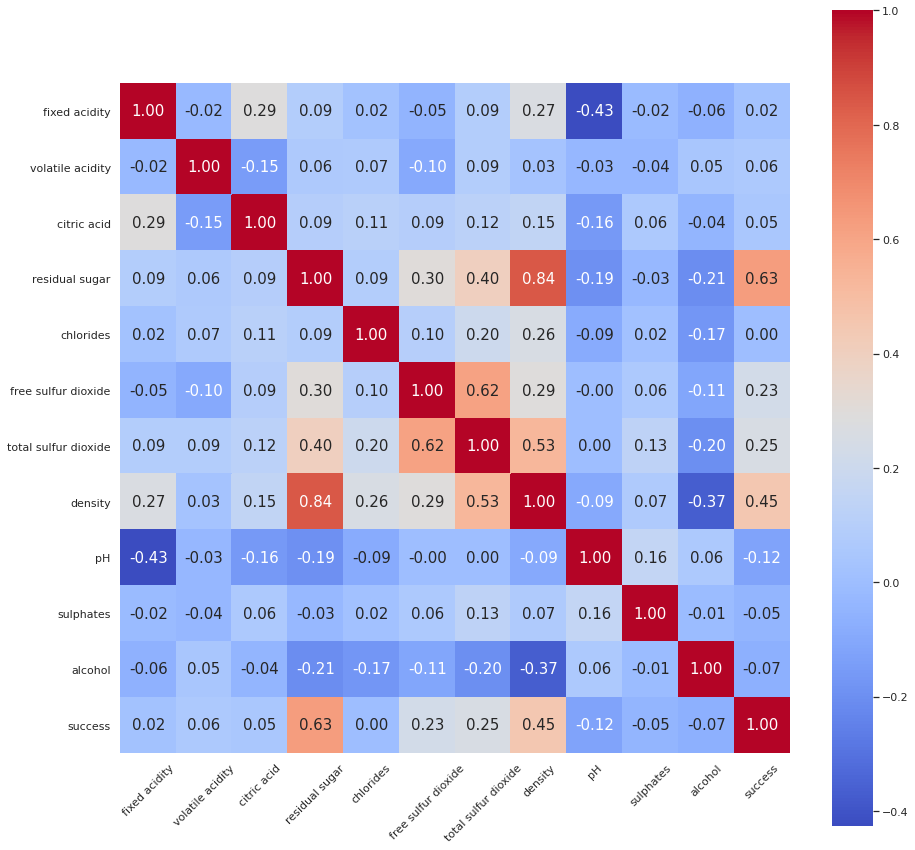

In [ ]:
#Mapa de Correlaciones 
corr = data.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
                      cmap= 'coolwarm')
plt.xticks(rotation = 45) 
plt.yticks(rotation = 0)
plt.show()

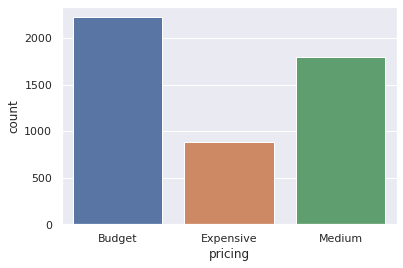

In [ ]:
sns.countplot(data = data, x = "pricing")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


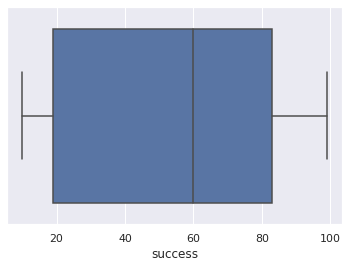

In [ ]:
sns.boxplot(data['success'])

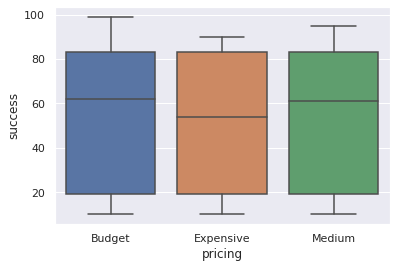

In [ ]:
sns.boxplot(data = data, x = "pricing", y = "success")

Elección de la clase de modelo y construcción de variable objetivo

In [6]:
satisfaccion = []
for i in data['success']:
    if i >= 0 and i <= 70:
        satisfaccion.append('No')
    elif i >= 71 and i <= 100:
        satisfaccion.append('Si')
data['Satisfaccion'] = satisfaccion

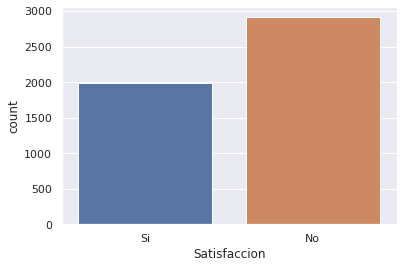

In [7]:
sns.countplot(data = data, x = "Satisfaccion")

Selección de variables y preparación del modelo

In [8]:
X = data[['residual sugar', 'density']]
y = data.Satisfaccion

In [9]:
X.head()

,residual sugar,density
0,20.7,1.0010
1,1.6,0.9940
2,6.9,0.9951
3,8.5,0.9956
4,8.5,0.9956


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
print(X)

[[ 2.82134917  2.33151201]
 [-0.94476527 -0.00915417]
 [ 0.10028219  0.3586648 ]
 ...
 [-1.02363678 -0.49735026]
 [-1.04335466 -1.78471666]
 [-1.10250829 -1.54396243]]


In [12]:
y.head()

0    Si
1    No
2    No
3    Si
4    Si
Name: Satisfaccion, dtype: object

Importación de librerías de modelamiento y  creación de muestras de entrenamiento y test, creación y entrenamiento de modelo de árbol de clasificación

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [15]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [16]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

Métricas de evaluación del modelo obtenido

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.8203103729921045
Porcentaje de aceirtos sobre el set de evaluación: 0.8163265306122449


In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[1753,  421],
       [ 244, 1255]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[615, 125],
       [ 78, 407]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

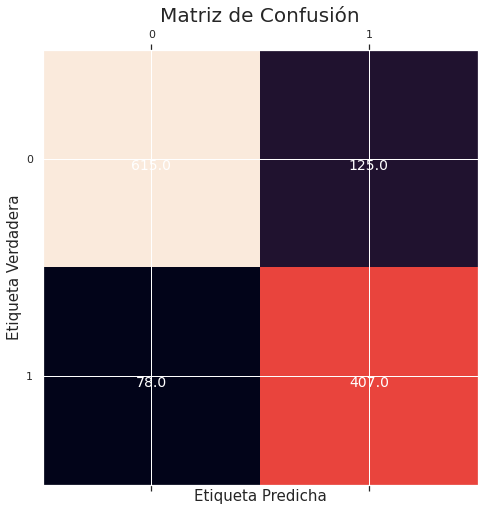

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='top', c = 'white', fontsize=14)
    # Visualizar com texto el resultado de la matriz de confusion.

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.89      0.83      0.86       740
          Si       0.77      0.84      0.80       485

    accuracy                           0.83      1225
   macro avg       0.83      0.84      0.83      1225
weighted avg       0.84      0.83      0.84      1225



Visualización del árbol

In [ ]:
from sklearn import tree

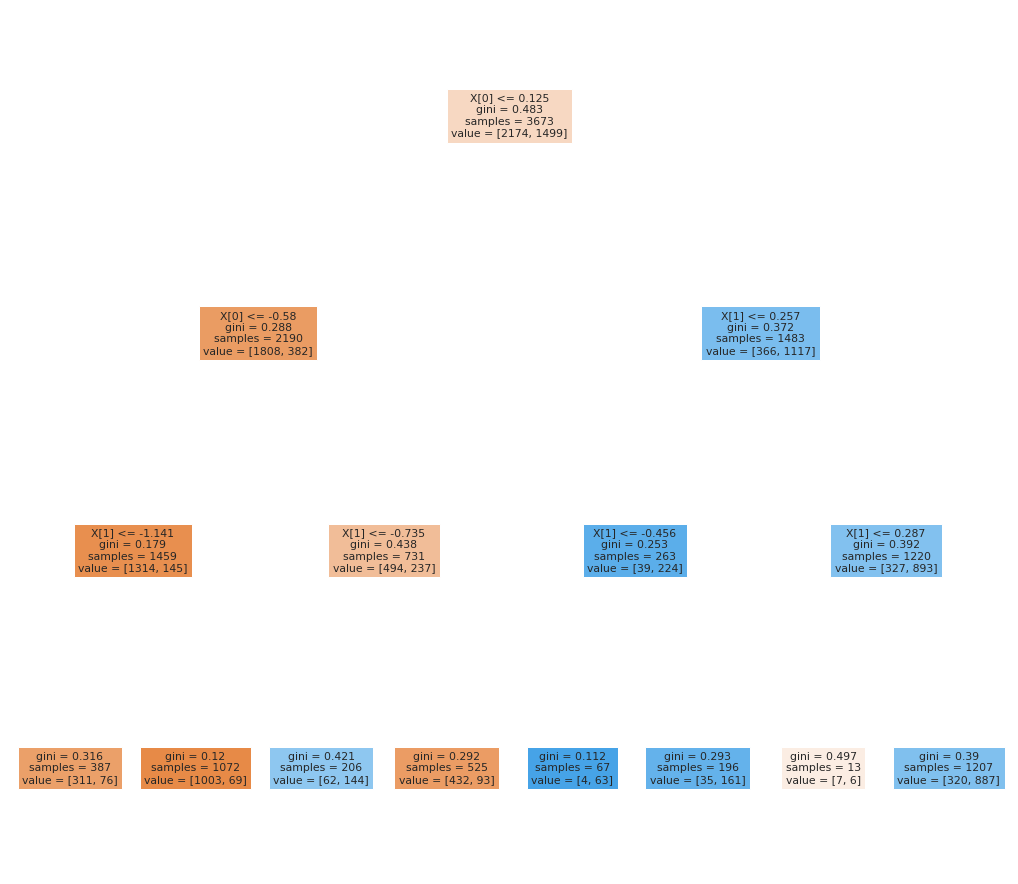

In [ ]:
plt.figure(figsize = (18,16))
tree.plot_tree(clf, filled = True)
plt.show()

Optimización de hiperparámetros para el árbol de clasificación

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
profundidad = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in profundidad:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad deseado
    clf = DecisionTreeClassifier(max_depth=k)
    
    # Entrenar el modelo
    clf.fit(x_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

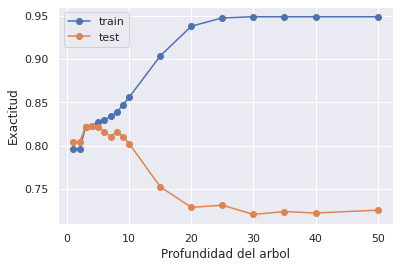

In [ ]:
plt.plot(profundidad,lista_accuracy_train,'o-',label='train' )
plt.plot(profundidad,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del arbol')
plt.ylabel('Exactitud')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

Segundo modelo: Modelo KNN para clasificación

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(x_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

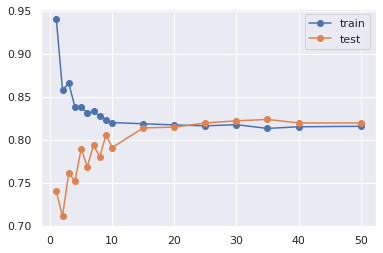

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()